In [7]:
#To visualize Figure 2 in our manuscript, please use the **'Figure2.ipynb'** notebook, 
#which is based on the R language. Ensure R is enabled in your Jupyter notebook; 
#if not, install the IRkernel package in R with these commands:

#install.packages('IRkernel')
#IRkernel::installspec(user = FALSE)

#To run the notebook, simply adjust the following paths:

#base_result_path for the TransformerST output, 
#base_data_path for spatial transcriptomics data, 
#and base_output_path to visualize the ARI for all 12 samples.
#The data and results are accessible through the following link:
#https://drive.google.com/drive/u/0/folders/1w78k4P6eqaedRkUmac_GdjiU7tavW5P4

In [ ]:
!pip install requests

In [ ]:
library(mclust)
library(ggplot2)
library(patchwork)
library(Seurat)
library(mclust)
library(dplyr)
options(bitmapType = 'cairo')

args <- commandArgs(trailingOnly = TRUE)
#sample <- args[1]

In [ ]:
#The data and results are accessible through the following link:
#https://drive.google.com/drive/u/0/folders/1w78k4P6eqaedRkUmac_GdjiU7tavW5P4


In [ ]:
#read clustering result

In [17]:
sample <- "151508"
base_result_path <- "/media/cyzhao/New_Volume/output/DLPFC/"
base_data_path <- "/media/cyzhao/New_Volume/data/DLPFC/"

# Construct full paths for the files
sp_data_path <- file.path(base_result_path, sample, "/Seurat_final.rds")
metadata_file_path <- file.path(base_data_path, sample, "metadata.tsv")
sp_data <- readRDS(sp_data_path)

##### SpatialDimPlot
metadata <- read.table(metadata_file_path, sep='\t', header=TRUE)


In [19]:
our_cluster_path <- file.path(base_result_path, sample, "TransformerST/metadata.tsv")
bayesSpace_cluster_path <- file.path(base_result_path, sample, "BayesSpace/metadata.tsv")
spaGCN_cluster_path <- file.path(base_result_path, sample, "SpaGCN/metadata.tsv")
giotto_cluster_path <- file.path(base_result_path, sample, "Giotto/metadata.tsv")
stLearn_cluster_path <- file.path(base_result_path, sample, "stLearn/metadata.tsv")
ccst_cluster_path <- file.path(base_result_path, sample, "lambdaI0.3/metadata.tsv")
stagate_cluster_path <- file.path(base_result_path, sample, "STAGATE1/metadata.tsv")
const_cluster_path <- file.path(base_result_path, sample, "conST/metadata.tsv")
deepst_cluster_path <- file.path(base_result_path, sample, "DEEPST/metadata.tsv")

# Read the metadata for each cluster
Our_cluster <- read.table(our_cluster_path, sep='\t', header=TRUE)
BayesSpace_cluster <- read.table(bayesSpace_cluster_path, sep='\t', header=TRUE)
spaGCN_cluster <- read.table(spaGCN_cluster_path, sep='\t', header=TRUE)
Giotto_cluster <- read.table(giotto_cluster_path, sep='\t', header=TRUE)
stLearn_cluster <- read.table(stLearn_cluster_path, sep='\t', header=TRUE)
ccst_cluster <- read.table(ccst_cluster_path, sep='\t', header=TRUE)
STAGATE_cluster <- read.table(stagate_cluster_path, sep='\t', header=TRUE)
CONST_cluster <- read.table(const_cluster_path, sep='\t', header=TRUE)
DEEPST_cluster <- read.table(deepst_cluster_path, sep='\t', header=TRUE)
# Set row names for Giotto_cluster
row.names(Giotto_cluster) <- Giotto_cluster$cell_ID

truth <- as.factor(metadata$layer_guess)
truth <- factor(truth, levels=c('WM', 'nan', 'Layer6', 'Layer5', 'Layer4', 'Layer3', 'Layer2', 'Layer1'))

In [20]:
sp_data <- AddMetaData(sp_data, truth, col.name = 'layer_guess')
sp_data <- AddMetaData(sp_data, spaGCN_cluster$refined_pred, col.name = 'SpaGCN')
sp_data <- AddMetaData(sp_data, Our_cluster$TransformerST, col.name = 'TransformerST')
sp_data <- AddMetaData(sp_data, BayesSpace_cluster$spatial.cluster, col.name = 'BayesSpace')
sp_data <- AddMetaData(sp_data, Giotto_cluster[, 'HMRF_cluster', drop=F], col.name = 'Giotto')
sp_data <- AddMetaData(sp_data, stLearn_cluster$X_pca_kmeans, col.name = 'stLearn')
sp_data <- AddMetaData(sp_data, BayesSpace_cluster$kmeans, col.name = 'Kmeans')
sp_data <- AddMetaData(sp_data, BayesSpace_cluster$louvain, col.name = 'Louvain')
sp_data <- AddMetaData(sp_data, BayesSpace_cluster$mclust, col.name = 'Mclust')
sp_data <- AddMetaData(sp_data, STAGATE_cluster$STAGATE, col.name = 'STAGATE')
sp_data <- AddMetaData(sp_data, ccst_cluster$CCST, col.name = 'CCST')
sp_data <- AddMetaData(sp_data, CONST_cluster$conST_refine, col.name = 'CONST')
sp_data <- AddMetaData(sp_data, DEEPST_cluster$DEEPST, col.name = 'DEEPSTST')

In [ ]:
#calculating the Adjusted Rand Index (ARI) for various clustering methods

In [21]:
SpaGCN_ARI = adjustedRandIndex(sp_data@meta.data$layer_guess, sp_data@meta.data$SpaGCN)
# Seurat_ARI = adjustedRandIndex(sp_data@meta.data$layer_guess, sp_data@meta.data$Seurat)
Our_ARI = adjustedRandIndex(sp_data@meta.data$layer_guess, sp_data@meta.data$TransformerST)
BayesSpace_ARI = adjustedRandIndex(sp_data@meta.data$layer_guess, sp_data@meta.data$BayesSpace)
Giotto_ARI = adjustedRandIndex(sp_data@meta.data$layer_guess, sp_data@meta.data$Giotto)
stLearn_ARI = adjustedRandIndex(sp_data@meta.data$layer_guess, sp_data@meta.data$stLearn)
Kmeans_ARI = adjustedRandIndex(sp_data@meta.data$layer_guess, sp_data@meta.data$Kmeans)
Mclust_ARI = adjustedRandIndex(sp_data@meta.data$layer_guess, sp_data@meta.data$Mclust)
Louvain_ARI = adjustedRandIndex(sp_data@meta.data$layer_guess, sp_data@meta.data$Louvain)
CCST_ARI = adjustedRandIndex(sp_data@meta.data$layer_guess, sp_data@meta.data$CCST)
CONST_ARI = adjustedRandIndex(sp_data@meta.data$layer_guess, sp_data@meta.data$CONST)
DEEPST_ARI = adjustedRandIndex(sp_data@meta.data$layer_guess, sp_data@meta.data$DEEPST)
STAGATE_ARI = adjustedRandIndex(sp_data@meta.data$layer_guess, sp_data@meta.data$STAGATE)

In [22]:
#visualize the performance of various clustering methods for a single sample

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


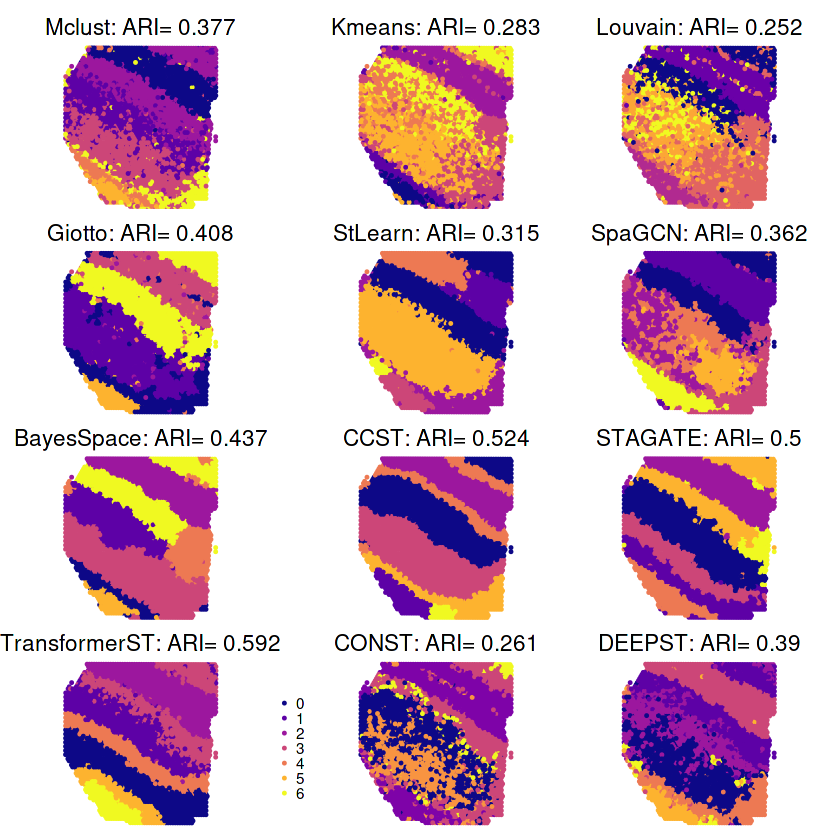

In [23]:
df_clusters <- data.frame(layer_guess = sp_data@meta.data$layer_guess,
                          SpaGCN = as.factor(sp_data@meta.data$SpaGCN),
                          # Seurat = as.factor(sp_data@meta.data$Seurat),
                          TransformerST = as.factor(sp_data@meta.data$TransformerST),
                          BayesSpace = as.factor(sp_data@meta.data$BayesSpace),
                          Kmeans = as.factor(sp_data@meta.data$Kmeans),
                          Mclust = as.factor(sp_data@meta.data$Mclust),
                          Louvain = as.factor(sp_data@meta.data$Louvain),
                          Giotto = as.factor(sp_data@meta.data$Giotto),
                          stLearn = as.factor(sp_data@meta.data$stLearn),
                          CCST = as.factor(sp_data@meta.data$CCST),
                          STAGATE = as.factor(sp_data@meta.data$STAGATE),
                          CONST= as.factor(sp_data@meta.data$CONST),
                          DEEPST= as.factor(sp_data@meta.data$DEEPST)
                          )

df <- sp_data@images$slice1@coordinates
df <- cbind(df, df_clusters)
p0 <- ggplot(df, aes(imagecol, imagerow, color=layer_guess)) + geom_point(stroke=0, size=1.1) + ggtitle('Ground Truth') +
  coord_fixed() + scale_y_reverse() + theme_void() + viridis::scale_color_viridis(option="plasma", discrete = T)+theme(plot.title = element_text(hjust = 0.5))

# p1 <- ggplot(df, aes(imagecol, imagerow, color=Seurat)) + geom_point(stroke=0, size=1.1) + ggtitle(paste('Seurat: ARI=', round(Seurat_ARI, 3))) +
#   coord_fixed() + scale_y_reverse() + theme_void() + viridis::scale_color_viridis(option="plasma", discrete = T)
p1 <- ggplot(df, aes(imagecol, imagerow, color=Mclust)) + geom_point(stroke=0, size=1.1) + ggtitle(paste('Mclust: ARI=', round(Mclust_ARI, 3))) +
    coord_fixed() + scale_y_reverse() + theme_void() + viridis::scale_color_viridis(option="plasma", discrete = T)+theme(plot.title = element_text(hjust = 0.5))+ theme(legend.position="none")
p2 <- ggplot(df, aes(imagecol, imagerow, color=Kmeans)) + geom_point(stroke=0, size=1.1) + ggtitle(paste('Kmeans: ARI=', round(Kmeans_ARI, 3))) +
  coord_fixed() + scale_y_reverse() + theme_void() + viridis::scale_color_viridis(option="plasma", discrete = T)+theme(plot.title = element_text(hjust = 0.5))+ theme(legend.position="none")
p3 <- ggplot(df, aes(imagecol, imagerow, color=Louvain)) + geom_point(stroke=0, size=1.1) + ggtitle(paste('Louvain: ARI=', round(Louvain_ARI, 3))) +
  coord_fixed() + scale_y_reverse() + theme_void() + viridis::scale_color_viridis(option="plasma", discrete = T)+theme(plot.title = element_text(hjust = 0.5))+ theme(legend.position="none")
p4 <- ggplot(df, aes(imagecol, imagerow, color=Giotto)) + geom_point(stroke=0, size=1.1) + ggtitle(paste('Giotto: ARI=', round(Giotto_ARI, 3))) +
  coord_fixed() + scale_y_reverse() + theme_void() + viridis::scale_color_viridis(option="plasma", discrete = T)+theme(plot.title = element_text(hjust = 0.5))+ theme(legend.position="none")

p5 <- ggplot(df, aes(imagecol, imagerow, color=stLearn)) + geom_point(stroke=0, size=1.1) + ggtitle(paste('StLearn: ARI=', round(stLearn_ARI, 3))) +
  coord_fixed() + scale_y_reverse() + theme_void() + viridis::scale_color_viridis(option="plasma", discrete = T)+theme(plot.title = element_text(hjust = 0.5))+ theme(legend.position="none")

p10 <- ggplot(df, aes(imagecol, imagerow, color=TransformerST)) + geom_point(stroke=0, size=1.1) + ggtitle(paste('TransformerST: ARI=', round(Our_ARI, 3))) +
  coord_fixed() + scale_y_reverse() + theme_void() + viridis::scale_color_viridis(option="plasma", discrete = T)+theme(plot.title = element_text(hjust = 0.5))

p7 <- ggplot(df, aes(imagecol, imagerow, color=BayesSpace)) + geom_point(stroke=0, size=1.1) + ggtitle(paste('BayesSpace: ARI=', round(BayesSpace_ARI, 3))) +
  coord_fixed() + scale_y_reverse() + theme_void() + viridis::scale_color_viridis(option="plasma", discrete = T)+theme(plot.title = element_text(hjust = 0.5))+ theme(legend.position="none")

p6 <- ggplot(df, aes(imagecol, imagerow, color=SpaGCN)) + geom_point(stroke=0, size=1.1) + ggtitle(paste('SpaGCN: ARI=', round(SpaGCN_ARI, 3))) +
  coord_fixed() + scale_y_reverse() + theme_void() + viridis::scale_color_viridis(option="plasma", discrete = T)+theme(plot.title = element_text(hjust = 0.5))+ theme(legend.position="none")
p8 <- ggplot(df, aes(imagecol, imagerow, color=CCST)) + geom_point(stroke=0, size=1.1) + ggtitle(paste('CCST: ARI=', round(CCST_ARI, 3))) +
  coord_fixed() + scale_y_reverse() + theme_void() + viridis::scale_color_viridis(option="plasma", discrete = T)+theme(plot.title = element_text(hjust = 0.5))+ theme(legend.position="none")
p9 <- ggplot(df, aes(imagecol, imagerow, color=STAGATE)) + geom_point(stroke=0, size=1.1) + ggtitle(paste('STAGATE: ARI=', round(STAGATE_ARI, 3))) +
  coord_fixed() + scale_y_reverse() + theme_void() + viridis::scale_color_viridis(option="plasma", discrete = T)+theme(plot.title = element_text(hjust = 0.5))+ theme(legend.position="none")
p11 <- ggplot(df, aes(imagecol, imagerow, color=CONST)) + geom_point(stroke=0, size=1.1) + ggtitle(paste('CONST: ARI=', round(CONST_ARI, 3))) +
  coord_fixed() + scale_y_reverse() + theme_void() + viridis::scale_color_viridis(option="plasma", discrete = T)+theme(plot.title = element_text(hjust = 0.5))+ theme(legend.position="none")
p12 <- ggplot(df, aes(imagecol, imagerow, color=DEEPST)) + geom_point(stroke=0, size=1.1) + ggtitle(paste('DEEPST: ARI=', round(DEEPST_ARI, 3))) +
  coord_fixed() + scale_y_reverse() + theme_void() + viridis::scale_color_viridis(option="plasma", discrete = T)+theme(plot.title = element_text(hjust = 0.5))+ theme(legend.position="none")
p1 +p2+p3+p4+ p5 + p6 +p7+p8+ p9+p10+theme(legend.key.size = unit(0.1, 'cm'),legend.title = element_blank())+p11+p12+plot_layout(ncol = 3, widths = c(1,1,1), heights = c(1,1,1,1))
# p0+plot_layout(ncol = 5, widths = c(1,1,1), heights = c(1,1,1,1))


In [ ]:
#visualize the performance of various clustering methods with all 12 samples

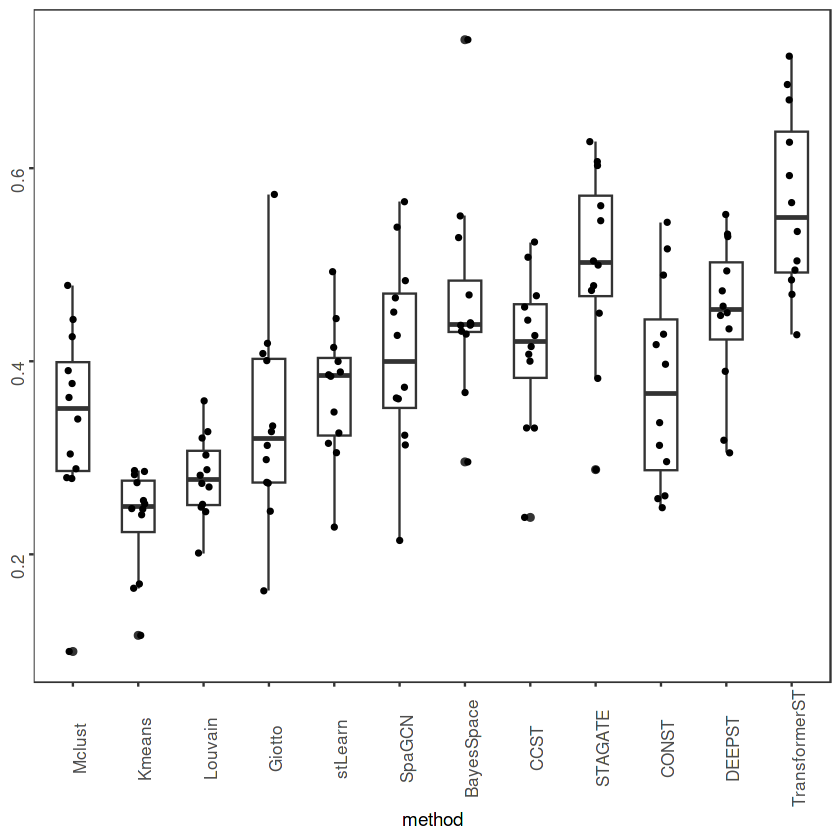

In [24]:
base_output_path <- "./output/DLPFC/"
list.samples <- c("151507", "151508", "151509", "151510", "151669", "151670", "151671", "151672", "151673", "151674", "151675", "151676")

list.methods <- c( "Mclust","Kmeans", "Louvain","Giotto","stLearn", "SpaGCN", "BayesSpace","CCST","STAGATE","CONST","DEEPST", "TransformerST")

##### Generate data
c1 <- c()
c2 <- c()
c3 <- c()

for (sample in list.samples) {
  file.results <- file.path(base_output_path, sample, '/Comparison/comparison.tsv')
  df.results <- read.table(file.results, sep='\t', header=T)
  for (method in list.methods){
    cluster <- df.results  %>% select(c(method))
    ARI <- adjustedRandIndex(x = df.results$layer_guess, y = cluster[, 1])
    
    c1 <- c(c1, method)
    c2 <- c(c2, sample)
    c3 <- c(c3, ARI)
  }
}

df.comp <- data.frame(method = c1,
                      sample = c2,
                      ARI = c3)


##### Plot results
df.comp$method <- as.factor(df.comp$method)
df.comp$method <- factor(df.comp$method, 
                         levels = c("Mclust","Kmeans", "Louvain","Giotto","stLearn", "SpaGCN", "BayesSpace", "CCST","STAGATE","CONST","DEEPST","TransformerST"))


ggplot(df.comp, aes(method, ARI)) + 
  geom_boxplot(width=0.5) + 
  geom_jitter(width = 0.1, size=1) +
  theme_bw() + 
  theme(panel.background = element_blank(),
        panel.grid = element_blank(), 
        axis.title.y = element_blank(), 
        axis.text = element_text(angle = 90,size=10)
        )